
# Connect to Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
base_path = '/content/drive/My Drive/WebDetection/'
if os.path.exists(base_path):
    print(f"Folder '{base_path}' is exist.")
else:
    print(f"Folder '{base_path}' isn't exist.")

Folder '/content/drive/My Drive/WebDetection/' is exist.


In [ ]:
train=pd.read_csv(base_path+'dataset/csic_database.csv')

In [ ]:
df_train = train.copy()

In [ ]:
# Thay NaN bằng chuỗi rỗng
df_train['content'] = df_train['content'].fillna('')
df_train['url_clean'] = df_train['URL'].apply(lambda x: x.split(' ')[0])

url_train = df_train.apply(lambda row: f"{row['url_clean']}?{row['content']}" if row['content'] else row['url_clean'], axis=1)
label_train = df_train['classification']


print("url: %s" % url_train[40])
print("label: %s\n" % label_train[0])

url: http://localhost:8080/tienda1/publico/autenticar.jsp?modo=entrar&login=magrath&pwd=1an0re%E15354&remember=off&B1=Entrar
label: 0



In [ ]:
labels_type = pd.Series(label_train).value_counts().keys().tolist()
type_dict = {label: idx for idx, label in enumerate(labels_type)}
print("Type of label")
print(type_dict)

num_classes = len(type_dict)
print("Number of classes: %d" % num_classes)


Type of label
{0: 0, 1: 1}
Number of classes: 2


In [ ]:
import json
import string
tokenizer = Tokenizer(filters='\t\n', char_level=True)  # Create a tokenizer with character-level tokenization, ignoring tabs and newlines
alphabet = string.printable

tokenizer.fit_on_texts(alphabet)  # Fit the tokenizer on the training data (url_train)

num_words = len(tokenizer.word_index) + 1  # Get the total number of unique tokens (add 1 for padding or special tokens)
vocab = tokenizer.word_index  # Retrieve the vocabulary (mapping of tokens to indices)
print("The size of the vocabulary is %d" % num_words)  # Print the vocabulary size
print("Vocabulary:")
print(vocab)  # Print the vocabulary dictionary


The size of the vocabulary is 75
Vocabulary:
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '0': 27, '1': 28, '2': 29, '3': 30, '4': 31, '5': 32, '6': 33, '7': 34, '8': 35, '9': 36, '!': 37, '"': 38, '#': 39, '$': 40, '%': 41, '&': 42, "'": 43, '(': 44, ')': 45, '*': 46, '+': 47, ',': 48, '-': 49, '.': 50, '/': 51, ':': 52, ';': 53, '<': 54, '=': 55, '>': 56, '?': 57, '@': 58, '[': 59, '\\': 60, ']': 61, '^': 62, '_': 63, '`': 64, '{': 65, '|': 66, '}': 67, '~': 68, ' ': 69, '\t': 70, '\n': 71, '\r': 72, '\x0b': 73, '\x0c': 74}


In [ ]:
def get_one_hot_value(s):
    return [0 if i!= type_dict[s] else 1 for i in range(2)]

In [ ]:
url_train_lens = [len(u) for u in url_train]
print(np.percentile(np.array(url_train_lens),98))

341.0


In [ ]:
max_len = 400

seq_train = tokenizer.texts_to_sequences(url_train)

X_train = pad_sequences(seq_train, maxlen=max_len)

Y_train = [get_one_hot_value(l) for l in label_train]
print("=================================================================================================")

print("url: %s" % url_train[0])
print("label: %s\n" % label_train[0])

print("url_vec: " + str(X_train[0]))
print("label_one_hot: " + str(Y_train[0]))
print("=================================================================================================")

url: http://localhost:8080/tienda1/index.jsp
label: 0

url_vec: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

# Convert into image



In [ ]:
# # Convert into image

# import numpy as np
# from PIL import Image

# seq_train = pad_sequences(seq_train, maxlen=max_len)

# normal_folder = os.path.join(base_path, 'images/normal/')
# anomalous_folder = os.path.join(base_path, 'images/anomalous/')

# # Make sure the folder where the images are stored exists
# os.makedirs(normal_folder, exist_ok=True)
# os.makedirs(anomalous_folder, exist_ok=True)

# image_size=(20, 20)

# for i, row in df_train.iterrows():
#     label = row['Label']
#     sequence = seq_train[i]

#     seq_padded = pad_sequences([sequence], maxlen=image_size[0] * image_size[1], padding='post', truncating='post')[0]
#     matrix = np.array(seq_padded).reshape(image_size)

#     img = Image.fromarray(matrix, mode='L')

#     if label == 'Normal':
#         target_folder = normal_folder
#     elif label == 'Anomalous':
#         target_folder = anomalous_folder
#     else:
#         continue  # Bỏ qua nếu nhãn không hợp lệ

#     img_path = os.path.join(target_folder, f"image_{i}.png")
#     try:
#         img.save(img_path)
#     except Exception as e:
#         print(f"Lỗi khi lưu ảnh {img_path}: {e}")


# print("Hoàn thành tạo và phân loại ảnh!")

Hoàn thành tạo và phân loại ảnh!




# Training CNN


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling, Embedding, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall
from sklearn import metrics

In [ ]:
model = Sequential([
    Embedding(num_words, 64, input_length=max_len),
    Conv1D(256, 7, activation='relu'),
    MaxPooling1D(3),
    Conv1D(256, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(2, activation='softmax'),
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[Precision(), Recall()]
    )

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from sklearn.model_selection import train_test_split

X_train = np.array(X_train)
Y_train = np.array(Y_train)
# Chia X_train, Y_train thành dữ liệu huấn luyện và validation
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [ ]:
# Training
model.fit(X_train_split, Y_train_split, validation_split=0.25, epochs=7, batch_size=128, callbacks=[])

Epoch 1/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.3455 - precision: 0.8194 - recall: 0.8194 - val_loss: 0.0792 - val_precision: 0.9740 - val_recall: 0.9740
Epoch 2/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0834 - precision: 0.9736 - recall: 0.9736 - val_loss: 0.0697 - val_precision: 0.9786 - val_recall: 0.9786
Epoch 3/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0682 - precision: 0.9793 - recall: 0.9793 - val_loss: 0.0744 - val_precision: 0.9782 - val_recall: 0.9782
Epoch 4/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0558 - precision: 0.9845 - recall: 0.9845 - val_loss: 0.0690 - val_precision: 0.9794 - val_recall: 0.9794
Epoch 5/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0448 - precision: 0.9885 - recall: 0.9885 - val_loss: 0.0546 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 6/7
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0418 - precision: 0.9903 - recall: 0.9903 - val_loss: 0.0527 - val_precision: 0.9878 - val_recal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Dự đoán trên tập test
y_pred = model.predict(X_test_split)
y_pred_classes = np.argmax(y_pred, axis=1)  # Chọn nhãn dự đoán có xác suất cao nhất
y_true_classes = np.argmax(Y_test_split, axis=1)  # Chuyển y_test về dạng nhãn ban đầu (nếu là one-hot)


print(classification_report(y_true_classes, y_pred_classes))


573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10759
           1       1.00      0.97      0.98      7561

    accuracy                           0.98     18320
   macro avg       0.99      0.98      0.98     18320
weighted avg       0.99      0.98      0.98     18320



In [ ]:
# Save the model
model.save(base_path + 'test_detector.h5')

In [ ]:
# Load model
model = load_model(base_path + 'test_detector.h5')

In [ ]:
from sklearn.metrics import RocCurveDisplay

573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


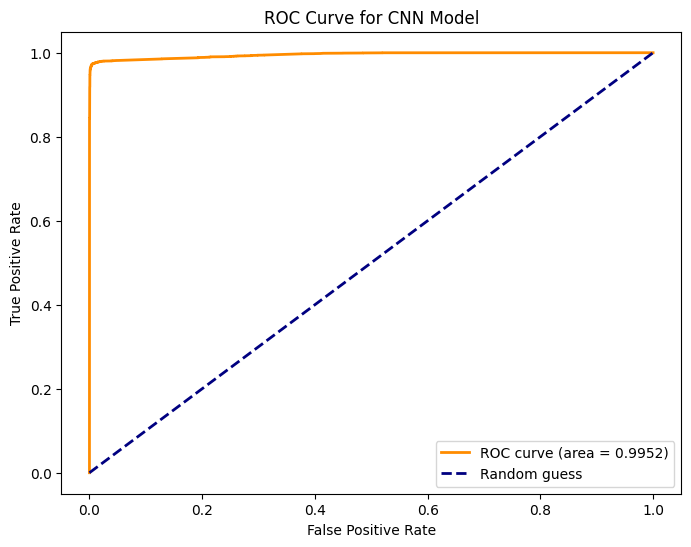

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Kiểm tra nếu Y_test_split là one-hot encoding, chuyển về nhãn gốc
if len(Y_test_split.shape) > 1 and Y_test_split.shape[1] > 1:
    Y_test_split_single = np.argmax(Y_test_split, axis=1)
else:
    Y_test_split_single = Y_test_split

# Dự đoán xác suất từ mô hình
y_pred_proba = model.predict(X_test_split)

# Nếu đầu ra là softmax (nhiều lớp), chỉ lấy xác suất của lớp dương (lớp 1)
if y_pred_proba.shape[1] > 1:  # Softmax
    y_pred_proba = y_pred_proba[:, 1]

# Tính FPR, TPR và AUC
fpr, tpr, _ = roc_curve(Y_test_split_single, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()
